In [1]:
import os
from PIL import Image
import pyocr
import pyocr.builders
import requests
import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
from ratio import get_ratio
from IPython.display import Image, display
from matplotlib import pyplot as plt

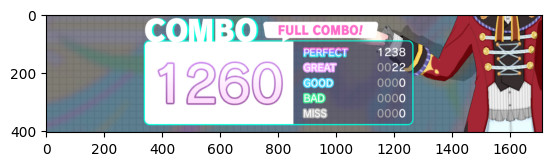

In [2]:
full_img = cv2.imread('../targets/wide.png')
full_img = cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)

full_img = full_img[
  full_img.shape[0] // 2 : full_img.shape[0] // 8 * 7,
  0 : full_img.shape[1] // 4 * 3
]

plt.imshow(full_img)

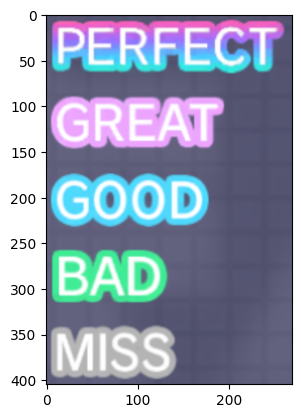

In [3]:
face_img = cv2.imread('./img2.png')
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

if full_img.shape[0] <= face_img.shape[0]:
  ratio = 1 - (face_img.shape[0] - full_img.shape[0]) / face_img.shape[0]
else:
  ratio = 1

face_img = cv2.resize(face_img, None, None, ratio, ratio)

plt.imshow(face_img)

In [4]:
search_target_ratio = get_ratio(search_content=face_img, search_target=full_img)['search_target']

search_target_ratio

1.5943008507664493

In [5]:
full_img = cv2.resize(full_img, None, None, search_target_ratio, search_target_ratio)

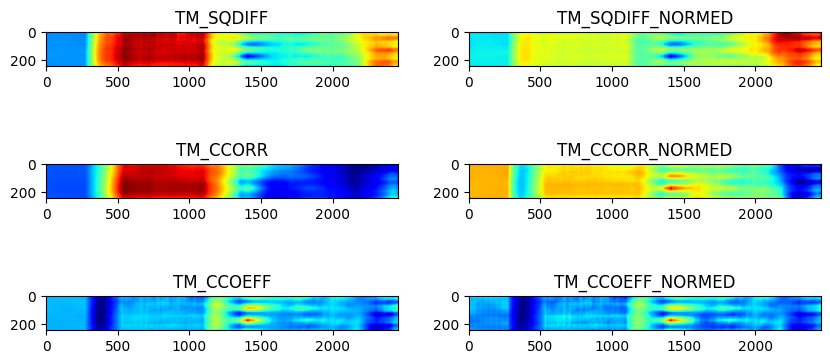

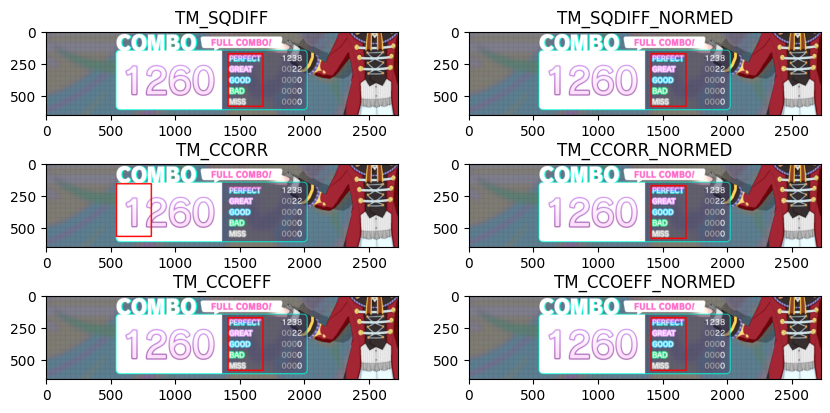

In [11]:
params = [
    "TM_SQDIFF",
    "TM_SQDIFF_NORMED",
    "TM_CCORR",
    "TM_CCORR_NORMED",
    "TM_CCOEFF",
    "TM_CCOEFF_NORMED",
]

fig = plt.figure(figsize=(10, 10))
fig2 = plt.figure(figsize=(10, 10))

for i, param in enumerate(params, 1):
    result = cv2.matchTemplate(full_img, face_img, getattr(cv2, param))
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)

    ax = fig.add_subplot(6, 2, i)
    ax.set_title(param)
    ax.imshow(result, cmap="jet")

    method = eval('cv2.' + param)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        tl = minLoc    
    else:
        tl = maxLoc

    br = (tl[0] + face_img.shape[1], tl[1] + face_img.shape[0])

    dst = full_img.copy()
    cv2.rectangle(dst, tl, br, 255, 10)
    ax2 = fig2.add_subplot(6, 2, i)
    ax2.set_title(param)
    ax2.imshow(dst)

plt.show()